In [1]:
import pandas as pd

stock_df = pd.read_csv("../Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.read_csv("../Dataset/df_merged.csv")
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [8]:
df["TotalCharges"].describe()

count    7043.000000
mean     2281.253259
std      2265.703526
min        18.800000
25%       401.900000
50%      1396.250000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [94]:
#stock dataset's TotalCharges was object
stock_df["TotalCharges"] = pd.to_numeric(stock_df["TotalCharges"], errors='coerce')
# stock_df["TotalCharges"].isna().sum()

In [99]:
stock_df["TotalCharges"].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [63]:
df["TotalCharges"].describe()

count    7043.000000
mean     2281.253259
std      2265.703526
min        18.800000
25%       401.900000
50%      1396.250000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


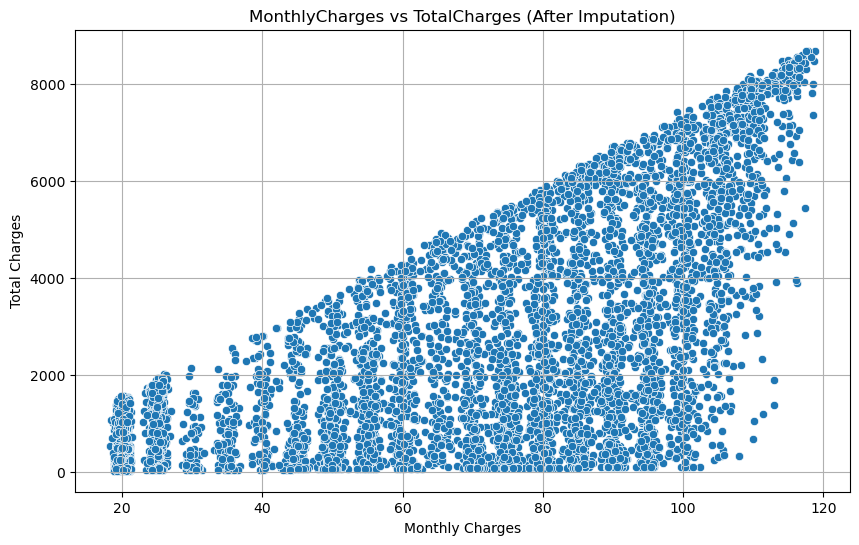

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df)
plt.title('MonthlyCharges vs TotalCharges (After Imputation)')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.grid(True)

plt.savefig("Monthly_vs_TotalCharges.png", dpi=300, bbox_inches='tight')

plt.show()
#strong positive correlation.)left -> right plot)

# Overall Churn Distributioon in our Dataset & Based on Contract type

In [120]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [118]:
df["Contract"].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

C:\Users\joela\AppData\Local\Temp\ipykernel_15840\1907222826.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, ax=axes[0], palette=['skyblue', 'salmon'])


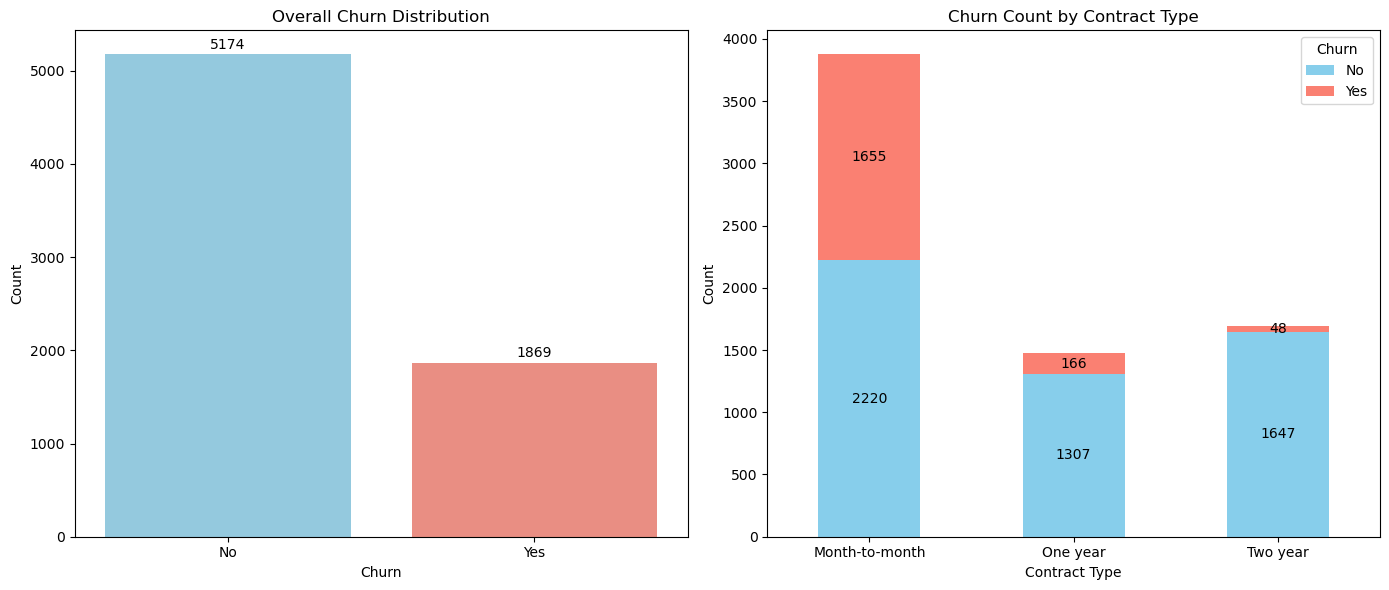

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- 1️ Overall Churn Count ---
sns.countplot(x="Churn", data=df, ax=axes[0], palette=['skyblue', 'salmon'])
axes[0].set_title("Overall Churn Distribution")
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Count")

# Add counts on top of bars
for p in axes[0].patches:
    axes[0].text(
        p.get_x() + p.get_width() / 2, 
        p.get_height() + 30, 
        int(p.get_height()), 
        ha='center', va='bottom'
    )

# --- 2️ Churn Count by Contract Type ---
churn_counts = df.groupby(['Contract', 'Churn']).size().unstack(fill_value=0)
churn_counts.plot(kind='bar', stacked=True, ax=axes[1], color=['skyblue', 'salmon'])

# Add count labels on stacked bars
for idx, row in churn_counts.iterrows():
    churn_no = row['No']
    churn_yes = row['Yes']
    x_pos = list(churn_counts.index).index(idx)
    
    # Label for 'No'
    axes[1].text(x_pos, churn_no / 2, str(churn_no), ha='center', va='center')
    # Label for 'Yes'
    axes[1].text(x_pos, churn_no + churn_yes / 2, str(churn_yes), ha='center', va='center')

axes[1].set_title("Churn Count by Contract Type")
axes[1].set_xlabel("Contract Type")
axes[1].set_ylabel("Count")
axes[1].legend(title="Churn")
axes[1].set_xticklabels(churn_counts.index, rotation=0)

plt.tight_layout()
plt.savefig("Plots/ChurnDistribution_BasedOnContract.png", dpi=300, bbox_inches='tight')
plt.show()

In [116]:
# Churn Rate based on our DataSet
(1869 / 7043) * 100

26.536987079369588

### Overall Churn Rate - ~ 27 % in this DataSet

- Only Around ~27% of the customers in this dataset have churned. This means that we are dealing with an imbalanced classification problem

- Out of induvidual Contract Type these are the Churn %'s

- | Contract Type  | Total Customers | Churned | Not Churned | % Churn |
| -------------- | --------------- | ------- | ----------- | ------- |
| Month-to-month | 3875            | 1655    | 2220        | ~43%    |
| One year       | 1473            | 166     | 1307        | ~11%    |
| Two year       | 1695            | 48      | 1647        | ~3%     |


- When modeling this Dataset it could cause data leakage bias and poor generalization for the real churn problem (which mostly occurs among flexible, month-to-month users).

- These numbers reflect the business reality: long-term contracts reduce churn (OBV)

## Underastanding Customer Demographic Data Points

- "Demographic data points” means information that describes who the customers are, their personal or background characteristics, not their usage or billing behavior.

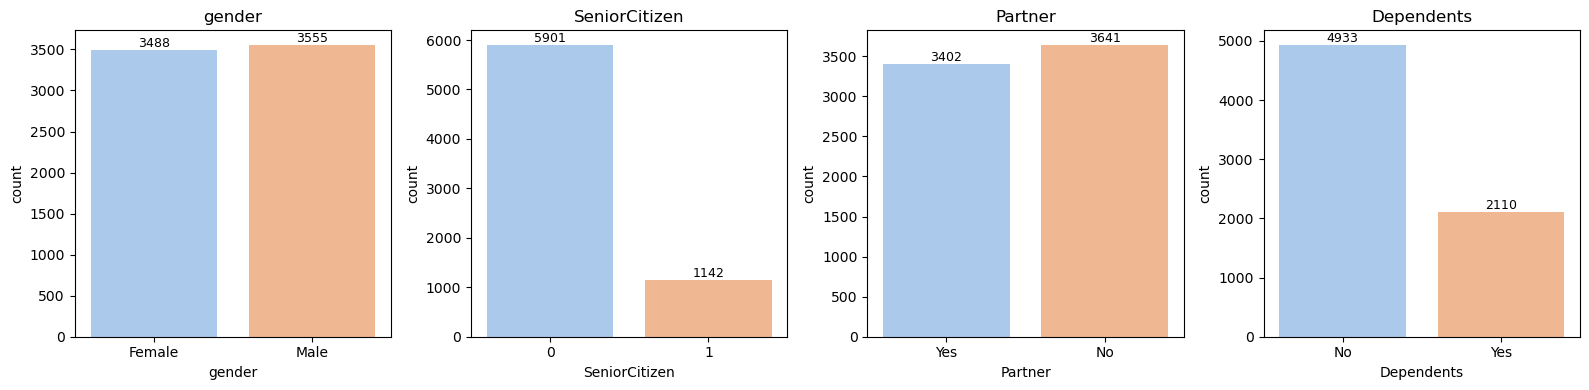

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents'] # Demographics col in our df

plt.figure(figsize=(16,4)) # initlizing a general size

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x=col, hue=col, data=df, legend=False, palette="pastel") 
    ax.set_title(col)
    for p in ax.patches:
        ax.text(p.get_x()+p.get_width()/2, p.get_height()+5, int(p.get_height()), 
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig("Plots/demographicCount.png", dpi=300, bbox_inches='tight')
plt.show()

- Most customers in the dataset are younger individuals without a dependent.
-  Equal distribution for user Gender and Marital status.

# Checking : B/w cost and customer churn via there Subscription Plan (Contract)

#### Q/ How do numeric features like tenure, MonthlyCharges, and TotalCharges differ between churners and non-churners?

- Assumption - In realWorld most people switch to different service providers because of Monlty subscription fee , is there a relation?

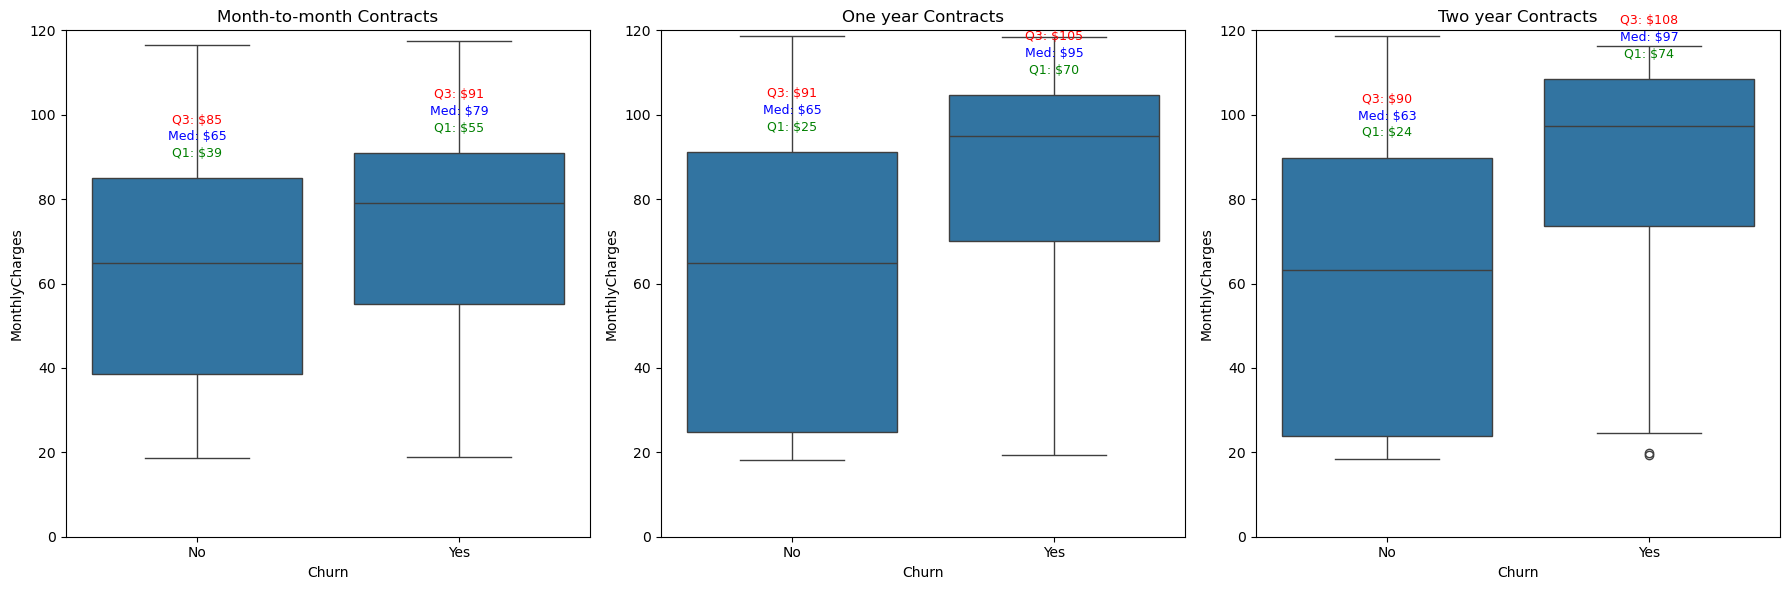

In [97]:
# Create separate boxplots for each contract type with annotations
plt.figure(figsize=(18, 6))

contract_types = ['Month-to-month', 'One year', 'Two year']

for i, contract in enumerate(contract_types):
    plt.subplot(1, 3, i+1)
    contract_data = df[df['Contract'] == contract]
    sns.boxplot(x='Churn', y='MonthlyCharges', data=contract_data)
    plt.title(f'{contract} Contracts')
    plt.ylim(0, 120)
    
    # Add Q1, Q2, Q3 annotations on the plot
    for j, churn in enumerate(['No', 'Yes']):
        data = contract_data[contract_data['Churn'] == churn]['MonthlyCharges']
        q1 = data.quantile(0.25)
        median = data.median()
        q3 = data.quantile(0.75)
        
        # Position text above each box
        y_pos = q3 + 5  # Just above the top of the box
        
        # Add text annotations
        plt.text(j, y_pos + 8, f'Q3: ${q3:.0f}', ha='center', fontsize=9, color='red')
        plt.text(j, y_pos + 4, f'Med: ${median:.0f}', ha='center', fontsize=9, color='blue')
        plt.text(j, y_pos, f'Q1: ${q1:.0f}', ha='center', fontsize=9, color='green')

plt.tight_layout()
plt.savefig("/Plots/Churn_by_Contract.png", dpi=300, bbox_inches='tight')
plt.show()

# Month to Month Contract Summary - "3875 Customers"

### Not Churned (loyal Customers)
- Q1 shows (39 $), 25% pay less than $39
- Q2 shows (65 $), 50% pay less than $65
- Q3 shows (85 $), 75% pay less than $85
### Churned
- Q1 shows (55 $), 25% pay less than $55
- Q2 shows (79 $), 50% pay less than $79
- Q3 shows (91 $), 75% pay less than $91
## Comparision from Churned (Monlty Cost) & Not Churned (Monlty Cost)
- 55 - 39 = 16
- 79 - 65 = 14
- 91 - 85 = 6

### Note : Even the cheapest 25% of churners Q1 pay more than 50% more of loyal customers 

### Coclusion:
- Among month-to-month customers (n = 3,875), churners consistently pay higher MonthlyCharges than non-churners (loyal customers).

- Even the lowest 25% of churners Q1 pay more than 50% of loyal customers.
→ This means churners tend to fall into higher billing brackets.

# 1. Hypothesis : Churners were having addition services compared to loyal customers, causing increase in montly fees and making them churn?
## 
Churners might be paying more because they have more additional services, not necessarily because the base price is high.

In [37]:
service_cols = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 
    'StreamingTV', 'StreamingMovies'
]

In [52]:
mtm_df = df[df['Contract'] == 'Month-to-month']

summary_list = []
for col in service_cols:
    tmp = mtm_df.groupby([col, 'Churn'])['MonthlyCharges'].mean().reset_index()
    tmp['Service'] = col
    tmp.rename(columns={col: 'ServiceValue'}, inplace=True)
    summary_list.append(tmp)

mtm_summary = pd.concat(summary_list).reset_index(drop=True)
mtm_summary.head()

,ServiceValue,Churn,MonthlyCharges,Service
0,No,No,37.070852,PhoneService
1,No,Yes,36.456536,PhoneService
2,Yes,No,64.186405,PhoneService
3,Yes,Yes,76.743842,PhoneService
4,No,No,53.480800,MultipleLines


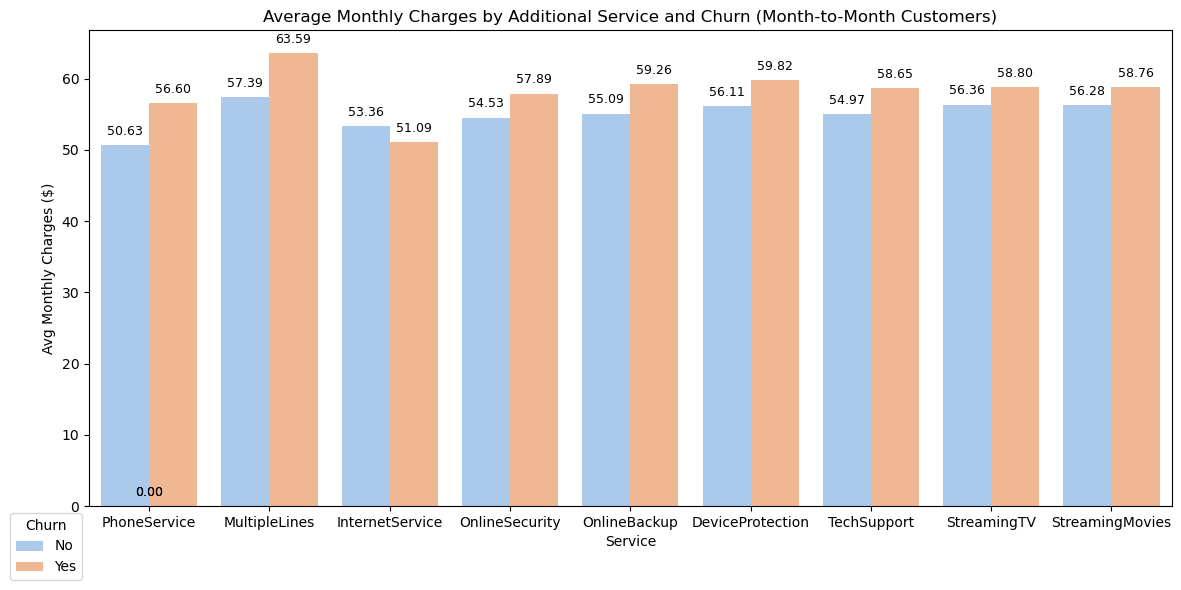

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=mtm_summary, 
    x='Service', 
    y='MonthlyCharges', 
    hue='Churn',
    errorbar=('ci', 0),  # remove confidence intervals
    palette='pastel'
)

# Annotate bars with the exact values
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width()/2, 
        y=height + 1,  # a little above the bar
        s=f"{height:.2f}", 
        ha='center', 
        va='bottom',
        fontsize=9
    )

plt.title("Average Monthly Charges by Additional Service and Churn (Month-to-Month Customers)")
plt.ylabel("Avg Monthly Charges ($)")
plt.xlabel("Service")
plt.legend(title='Churn', loc='best',  bbox_to_anchor=(0, 0, 0, 0))
plt.tight_layout()
plt.savefig("Plots/ComparisionOfServiceAVG.png", dpi=300, bbox_inches='tight')
plt.show()

C:\Users\joela\AppData\Local\Temp\ipykernel_15840\4159683274.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


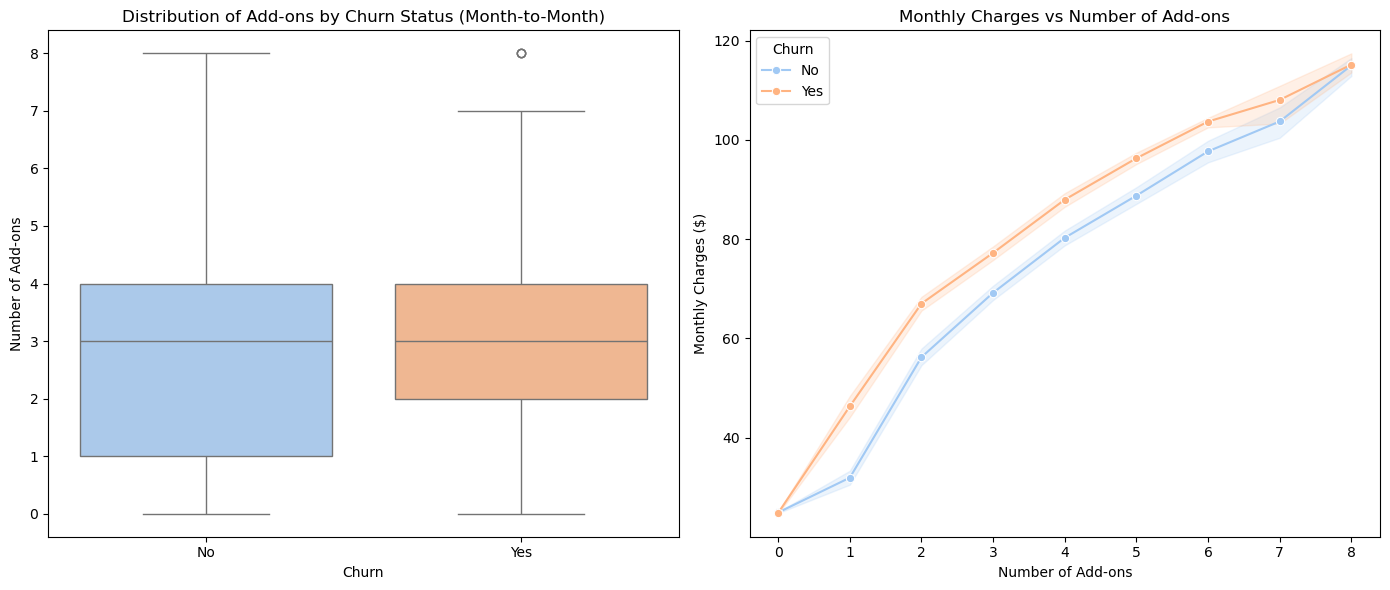

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot: Distribution of Add-ons by Churn
sns.boxplot(
    x='Churn', 
    y='num_addons', 
    data=mtm_df, 
    palette='pastel', 
    ax=axes[0]
)
axes[0].set_title("Distribution of Add-ons by Churn Status (Month-to-Month)")
axes[0].set_ylabel("Number of Add-ons")
axes[0].set_xlabel("Churn")

# Lineplot: Monthly Charges vs Number of Add-ons
sns.lineplot(
    x='num_addons', 
    y='MonthlyCharges', 
    hue='Churn', 
    data=mtm_df, 
    marker='o', 
    palette='pastel', 
    ax=axes[1]
)
axes[1].set_title("Monthly Charges vs Number of Add-ons")
axes[1].set_ylabel("Monthly Charges ($)")
axes[1].set_xlabel("Number of Add-ons")

# Adjust legend and layout
axes[1].legend(title='Churn')
plt.tight_layout()

# Save combined figure
plt.savefig("Plots/MTM_ChurnerImpactOnAddServices_Subplots.png", dpi=300, bbox_inches='tight')
plt.show()

- Churners do tend to have more add-ons on average, but the difference isn’t extreme enough to fully explain the higher MonthlyCharges.

- Some churners pay a lot because of many add-ons (those outliers), but overall, even customers with fewer add-ons still show slightly higher charges than loyal customers.

Overall, the Month-to-Month customer base isn’t paying unusually high charges. While churners sometimes have more add-ons and higher bills, most loyal customers also take multiple add-ons. So the pricing itself and the add-ons mix appear reasonable high charges aren’t the main driver of churn.

### These above contradicts my 1st Hypothesis

# 2. Hypothesis : Shorter tenure or Month-to-Month contracts lead to higher churn.

lets test whether customers who’ve been with the company for a short time (low tenure), or those who don’t have long-term contracts (month-to-month), are more likely to churn
- A short tenure : mean they haven’t yet built loyalty they’re more likely to leave quickly if unhappy.
- A month-to-month contract gives customers flexibility to leave anytime

C:\Users\joela\AppData\Local\Temp\ipykernel_15840\77811507.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x='Churn', y='tenure', data=stock_df, palette='pastel')


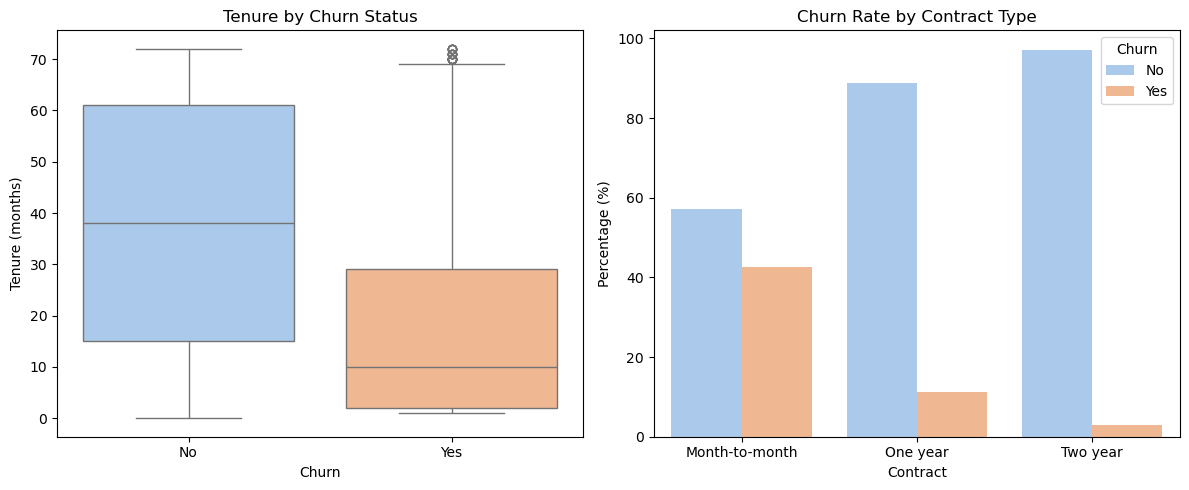

In [124]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(ax=axes[0], x='Churn', y='tenure', data=stock_df, palette='pastel')
axes[0].set_title("Tenure by Churn Status")
axes[0].set_ylabel("Tenure (months)")

contract_churn = (
    stock_df.groupby('Contract')['Churn']
    .value_counts(normalize=True)
    .rename('percentage')
    .mul(100)
    .reset_index()
)

sns.barplot(ax=axes[1], x='Contract', y='percentage', hue='Churn', data=contract_churn, palette='pastel')
axes[1].set_title("Churn Rate by Contract Type")
axes[1].set_ylabel("Percentage (%)")

plt.tight_layout()
plt.savefig("Plots/ShortTenureImpactOnChurnStatus.png", dpi=300, bbox_inches='tight')
plt.show()

- The boxplot clearly shows that churners (Yes) generally have a much shorter tenure compared to loyal customers.
- Non-churners’ tenures are more evenly distributed and longer (so loyaly helps with non churn)
- In 2nd plot we can see Month-2-Month contract customers have more probability for Churning than other 2 contracts (1 yr & 2 yr)

### These above supports my 2nd Hypothesis

# 3 . Hypothesis Certain payment methods might correlate with churn (e.g., manual payments vs. automatic).

In [128]:
mtm_df["PaymentMethod"].value_counts()

PaymentMethod
Electronic check             1850
Mailed check                  893
Bank transfer (automatic)     589
Credit card (automatic)       543
Name: count, dtype: int64

In [136]:
payment_churn = mtm_df.groupby(['PaymentMethod', 'Churn']).size().unstack(fill_value=0)
payment_churn['Churn %'] = payment_churn['Yes'] / (payment_churn['Yes'] + payment_churn['No']) * 100
payment_churn

Churn,No,Yes,Churn %
PaymentMethod,,,
Bank transfer (automatic),388,201,34.125637
Credit card (automatic),365,178,32.780847
Electronic check,856,994,53.729730
Mailed check,611,282,31.578947


- Electronic check has the highest churn rate among MTM customers at ~53.7%.
- Bank transfer (automatic) and credit card (automatic) have lower churn rates (~34% and ~33%), suggesting automatic payments are associated with lower churn.
- Mailed check has the lowest churn rate (~31.6%), indicating some manual payments aren’t necessarily risky ---> but fewer customers use this method compared to electronic check.

### Is Mailed Check Churn low coz of SeniorCitizen using it?

In [141]:
# Mailed checked is mostly prefered among Young Citizens - WOW
mailed_check_df = df[df['PaymentMethod'] == 'Mailed check']
print(mailed_check_df['SeniorCitizen'].value_counts())
# 0 - Non Senior (Young)
# 1 - Senior 

SeniorCitizen
0    1518
1      94
Name: count, dtype: int64


- Comapring Manual Payments - Electronic check vs. Mailed check - 
- Electronic check has the highest churn (53.7%), but this is mostly because many month-to-month customers use it.

- Mailed check shows a lower churn (~31.6%), even though it’s manual. So “manual payment” in itself isn’t causing churn.
  
### Therfore -  3rd Hypothesis contradicts to explain , PaymentMethod has relation with Churn even though there's (53.7%) churn rate on Electronic check 

#### Contrary to expectation, the majority of Month-to-Month customers using mailed checks are young, not senior citizens. Thus, low churn in this group is not driven by age. Payment method alone does not explain churn patterns.